<a href="https://colab.research.google.com/github/englishmuffins10/Homework/blob/main/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 10.7: Page 471

In [ ]:
# Area of a ten dimensional hypersphere
# Uses the basis of code by Jahred Adelman

import numpy as np
import time

d = 10                        # Number of dimensions to calculate for
V = 2**d                      # Volume of the hypercube formed by such dimensions
N = 5000000                   # Number of points for each dimension


tstart = time.perf_counter()  # Start Clock
squareSum = np.zeros(N)       # Array for the sum of squares
results = np.zeros(N)         # Results array
i = 0                         # Counter for dimensions
while i < d:                  # Get the sum of squares:
  xi_values = np.random.uniform(-1, 1, N)
  squareSum += xi_values**2
  i += 1

results[squareSum <= 1] = 1   # Get the results
tend = time.perf_counter()    # Stop Clock

print("Volume for N = ",N," is ",V*results.mean())
print("The estimate took ",(tend - tstart),"seconds")

Volume for N =  5000000  is  2.5503744
The estimate took  0.7662266309998813 seconds


2) 50x50 Ising model with J=1.0

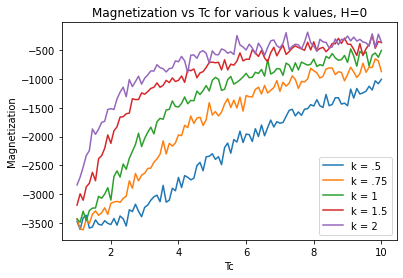

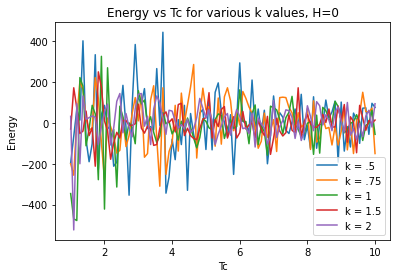

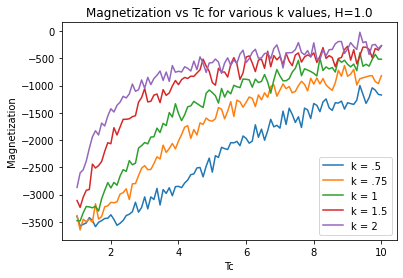

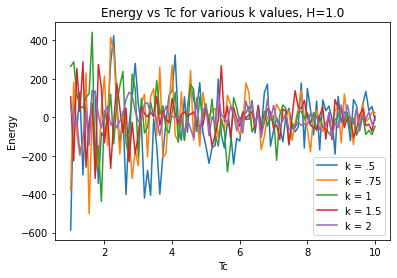

In [3]:
# Gets plots of E and M vs Tc for 5 k values
# Uses the basis of code by Jahred Adelman

from math import exp
from numpy import empty,sum,linspace
from random import random, randrange
from pylab import plot,show,xlabel,ylabel,subplots,title,legend

# Function to calculate the energy
def energy(s,H):
  return -J*(sum(s[0:L-1,:]*s[1:L,:]) + sum(s[:,0:L-1]*s[:,1:L]))-H*sum(s)

# Initializes the s, E, and M values
# Takes the length of the square area
# Returns s (2d array), E, and M
def Initialize(L,H):
  s = empty([L,L],int)
  for i in range(L):
    for j in range(L):
      if random() < 0.5:
        s[i,j] = +1
      else:
        s[i,j] = -1
  E = energy(s,H)
  M = sum(s)
  return s,E,M

# Gets the final E and M values
# Takes many variables
# Returns E and M
def Main(s, E, M, T, L, N, J):

  for k in range(N):
    # Save current energy
    oldE = E

    # Choose a random spin, flip it, and calculate dE
    i = randrange(L)
    j = randrange(L)
    # We could probably be move clever since "most" of the calculation doesn't change, only nearest neighbors
    # So let's try that here. We will flip the spin AFTER after calculating dE, too
    #E = energy(s)
    #deltaE = E - oldE
    iup = i+1
    idown = i-1
    jup = j+1
    jdown = j-1
    if (iup == L): iup = 0
    if (idown == 0): idown = L-1
    if (jup == L): jup = 0
    if (jdown == 0): jdown = L-1
    ### Factor of two comes from (1 - (-1) = 2)
    deltaE = 2*J*s[i,j]*(s[iup,j]+s[idown,j]+s[i,jup]+s[i,jdown])
    E = deltaE + oldE
    ### Flip!
    s[i,j] = -s[i,j]
    # Decide whether to accept the move or not
    if deltaE > 0.0: ### If dE < 0 we always keep things
      if random() > exp(-deltaE/T): 
        # Move rejected, revert to old state, don't need to recalculate M, we haven't changed it
        s[i,j] = -s[i,j]
        E = oldE
        continue
    # Accepted! Calculate new values
    M = sum(s)

  return M,E

# Constants
L = 50
N = 10000
J = 1.0
Tval = 100
H = 0
Tc = linspace(1,10,Tval)

# Changing Values (1)
k = .5
T = k*Tc
epoints1 = []
mpoints1 = []

# Get Values (1)
for val in T:
  s,E,M = Initialize(L,H)
  e, m = Main(s, E, M, val, L, N, J)
  epoints1.append(e)
  mpoints1.append(m)

# Changing Values (2)
k = .75
T = k*Tc
epoints2 = []
mpoints2 = []

# Get Values (2)
for val in T:
  s,E,M = Initialize(L,H)
  e, m = Main(s, E, M, val, L, N, J)
  epoints2.append(e)
  mpoints2.append(m)

# Changing Values (3)
k = 1
T = k*Tc
epoints3 = []
mpoints3 = []

# Get Values (3)
for val in T:
  s,E,M = Initialize(L,H)
  e, m = Main(s, E, M, val, L, N, J)
  epoints3.append(e)
  mpoints3.append(m)

# Changing Values (4)
k = 1.5
T = k*Tc
epoints4 = []
mpoints4= []

# Get Values (4)
for val in T:
  s,E,M = Initialize(L,H)
  e, m = Main(s, E, M, val, L, N, J)
  epoints4.append(e)
  mpoints4.append(m)

# Changing Values (5)
k = 2
T = k*Tc
epoints5 = []
mpoints5 = []

# Get Values (5)
for val in T:
  s,E,M = Initialize(L,H)
  e, m = Main(s, E, M, val, L, N, J)
  epoints5.append(e)
  mpoints5.append(m)

# Plots
xlabel('Tc')
ylabel('Magnetization')
title("Magnetization vs Tc for various k values, H=0")
plot(Tc, mpoints1, Label = "k = .5")
plot(Tc, mpoints2, Label = "k = .75")
plot(Tc, mpoints3, Label = "k = 1")
plot(Tc, mpoints4, Label = "k = 1.5")
plot(Tc, mpoints5, Label = "k = 2")
legend()
show()

xlabel('Tc')
ylabel('Energy')
title("Energy vs Tc for various k values, H=0")
plot(Tc, epoints1, Label = "k = .5")
plot(Tc, epoints2, Label = "k = .75")
plot(Tc, epoints3, Label = "k = 1")
plot(Tc, epoints4, Label = "k = 1.5")
plot(Tc, epoints5, Label = "k = 2")
legend()
show()

# Same as before, but with external magnetic field

H = 1.0

# Changing Values (1)
k = .5
T = k*Tc
epoints1 = []
mpoints1 = []

# Get Values (1)
for val in T:
  s,E,M = Initialize(L,H)
  e, m = Main(s, E, M, val, L, N, J)
  epoints1.append(e)
  mpoints1.append(m)

# Changing Values (2)
k = .75
T = k*Tc
epoints2 = []
mpoints2 = []

# Get Values (2)
for val in T:
  s,E,M = Initialize(L,H)
  e, m = Main(s, E, M, val, L, N, J)
  epoints2.append(e)
  mpoints2.append(m)

# Changing Values (3)
k = 1
T = k*Tc
epoints3 = []
mpoints3 = []

# Get Values (3)
for val in T:
  s,E,M = Initialize(L,H)
  e, m = Main(s, E, M, val, L, N, J)
  epoints3.append(e)
  mpoints3.append(m)

# Changing Values (4)
k = 1.5
T = k*Tc
epoints4 = []
mpoints4= []

# Get Values (4)
for val in T:
  s,E,M = Initialize(L,H)
  e, m = Main(s, E, M, val, L, N, J)
  epoints4.append(e)
  mpoints4.append(m)

# Changing Values (5)
k = 2
T = k*Tc
epoints5 = []
mpoints5 = []

# Get Values (5)
for val in T:
  s,E,M = Initialize(L,H)
  e, m = Main(s, E, M, val, L, N, J)
  epoints5.append(e)
  mpoints5.append(m)

# Plots
xlabel('Tc')
ylabel('Magnetization')
title("Magnetization vs Tc for various k values, H=1.0")
plot(Tc, mpoints1, Label = "k = .5")
plot(Tc, mpoints2, Label = "k = .75")
plot(Tc, mpoints3, Label = "k = 1")
plot(Tc, mpoints4, Label = "k = 1.5")
plot(Tc, mpoints5, Label = "k = 2")
legend()
show()

xlabel('Tc')
ylabel('Energy')
title("Energy vs Tc for various k values, H=1.0")
plot(Tc, epoints1, Label = "k = .5")
plot(Tc, epoints2, Label = "k = .75")
plot(Tc, epoints3, Label = "k = 1")
plot(Tc, epoints4, Label = "k = 1.5")
plot(Tc, epoints5, Label = "k = 2")
legend()
show()

Results:

As Tc increases, the magnetization values increase towards zero. The energy values get a smaller amplitude as Tc increases. As would be expected from these results, the higher the value of k (as shown by the equation T = k*Tc), the sooner and closer the magnetic values go to zero while the amplitude for the energy values decreases faster. Changing the external magnetic field has no perceivable effect on the magnetization, but it does effect the energy values quite a bit, lower them overall. 

